In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('premier-league-matches.csv')
df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season_End_Year  12026 non-null  int64 
 1   Wk               12026 non-null  int64 
 2   Date             12026 non-null  object
 3   Home             12026 non-null  object
 4   HomeGoals        12026 non-null  int64 
 5   AwayGoals        12026 non-null  int64 
 6   Away             12026 non-null  object
 7   FTR              12026 non-null  object
dtypes: int64(4), object(4)
memory usage: 751.8+ KB


<Axes: >

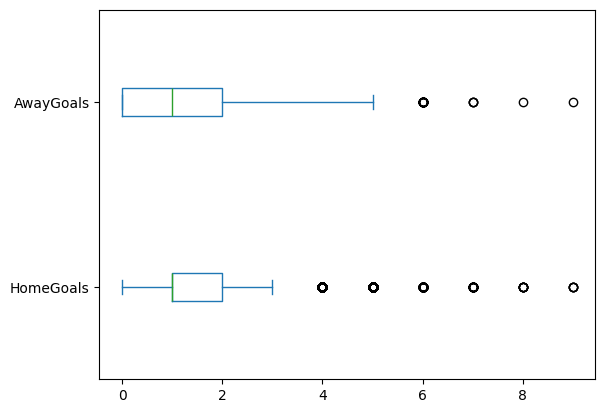

In [10]:
df[['HomeGoals','AwayGoals']].plot(kind='box', vert=False)

In [11]:
df["FTR"].value_counts()

FTR
H    5519
A    3410
D    3097
Name: count, dtype: int64

## Average number of goals per match

In [12]:
(df['HomeGoals'] + df['AwayGoals']).mean()

np.float64(2.666888408448362)

## Calculate average goals per season

In [13]:
df['Season_End_Year'].value_counts()

Season_End_Year
1993    462
1995    462
1994    462
2010    380
2022    380
2021    380
2020    380
2019    380
2018    380
2017    380
2016    380
2015    380
2014    380
2013    380
2012    380
2011    380
2008    380
2009    380
2007    380
2006    380
2005    380
2004    380
2003    380
2002    380
2001    380
2000    380
1999    380
1998    380
1997    380
1996    380
2023    380
Name: count, dtype: int64

In [14]:
df['TotalGoals'] = df['HomeGoals'] + df['AwayGoals']

In [15]:
goals_per_season = df.groupby("Season_End_Year")['TotalGoals'].mean().sort_index()
goals_per_season

Season_End_Year
1993    2.645022
1994    2.586580
1995    2.586580
1996    2.600000
1997    2.552632
1998    2.681579
1999    2.523684
2000    2.789474
2001    2.610526
2002    2.634211
2003    2.631579
2004    2.663158
2005    2.565789
2006    2.484211
2007    2.450000
2008    2.636842
2009    2.478947
2010    2.771053
2011    2.797368
2012    2.805263
2013    2.797368
2014    2.768421
2015    2.565789
2016    2.700000
2017    2.800000
2018    2.678947
2019    2.821053
2020    2.721053
2021    2.694737
2022    2.818421
2023    2.852632
Name: TotalGoals, dtype: float64

## what is the biggest goal difference in a match?

In [20]:
(df['HomeGoals'] - df['AwayGoals']).abs().sort_values(ascending=False).head()

11681    9
1246     9
10596    9
11093    9
10559    8
dtype: int64

## What's the team with most away wins

In [33]:
df.loc[df['FTR'] == 'A'].groupby('Away')['Away'].size().sort_values(ascending=False).head()

Away
Manchester Utd     309
Chelsea            269
Arsenal            263
Liverpool          252
Manchester City    204
Name: Away, dtype: int64

## Team with the most goals scored at home

In [37]:
df.groupby('Home')['HomeGoals'].sum().sort_values(ascending=False).head()

Home
Manchester Utd    1250
Arsenal           1207
Liverpool         1202
Chelsea           1141
Tottenham         1032
Name: HomeGoals, dtype: int64

## What's the team with the most goals scored playing as a visitor (away from home)?

In [43]:
df.groupby('Away')['AwayGoals'].sum().sort_values(ascending=False).head()

Away
Manchester Utd    993
Arsenal           898
Liverpool         894
Chelsea           870
Tottenham         783
Name: AwayGoals, dtype: int64